# Home Credit Default Risk

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

In [2]:
app_train_data = pd.read_csv('.../application_train.csv')

In [3]:
print('DATA SHAPE:',app_train_data.shape)
app_train_data.head()

DATA SHAPE: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test_data = pd.read_csv('../application_test.csv')

In [5]:
print('Test Data',app_test_data.shape)
app_test_data.head()

Test Data (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
app_train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

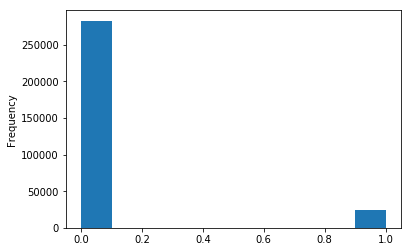

In [7]:
app_train_data['TARGET'].astype(int).plot.hist()

### Percentage of missing value Computation

In [8]:
def missing_value_list(x):
    mis_value = x.isnull().sum()
#     return mis_value
    
    mis_val_per = 100*(x.isnull().sum()/len(x))
#     return mis_val_per
    
    mis_val_tab = pd.concat([mis_value,mis_val_per],axis=1)
#     return mis_val_tab

#  Renaming the columns
    table_names = mis_val_tab.rename(columns = { 0:'Missing Value',1 : 'In Percentage'})
    

    table_names_nonzero = table_names[table_names.iloc[:,1]!=0].sort_values('In Percentage',axis = 0, ascending= False).round(2)
    

#     Printing the summary

    print('Number of columns in training data ' , str(x.shape[1]) , ' & number of rows ', str(x.shape[0]) +'\n'+
         'Number of variables with nonzero data:' + str(table_names_nonzero.shape[0]))
    
    return table_names_nonzero

In [9]:
missing_app_train = missing_value_list(app_train_data)
missing_app_train.head(10)

Number of columns in training data  122  & number of rows  307511
Number of variables with nonzero data:67


,Missing Value,In Percentage
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35


In [10]:
# missing_app_test = missing_value_list(app_test_data)
# missing_app_test.head(10)

# Number of columns in testing data  121  & number of rows  48744
# Number of variables with nonzero data:64 

Number of columns in training data  121  & number of rows  48744
Number of variables with nonzero data:64


,Missing Value,In Percentage
COMMONAREA_MODE,33495,68.72
COMMONAREA_MEDI,33495,68.72
COMMONAREA_AVG,33495,68.72
NONLIVINGAPARTMENTS_MEDI,33347,68.41
NONLIVINGAPARTMENTS_AVG,33347,68.41
NONLIVINGAPARTMENTS_MODE,33347,68.41
FONDKAPREMONT_MODE,32797,67.28
LIVINGAPARTMENTS_MODE,32780,67.25
LIVINGAPARTMENTS_MEDI,32780,67.25
LIVINGAPARTMENTS_AVG,32780,67.25


In [11]:
app_train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### Finding unique elements in each variable

In [12]:
app_train_data.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Label Encoding Process 

In [13]:
le = LabelEncoder()
le_count = 0 

for col in app_train_data:
    if app_train_data[col].dtype =='object':
        if len(list(app_train_data[col].unique())) <=2:
            print(col)
            # Training the training set data
            le.fit(app_train_data[col])
            
            # Transforming the training & Testing set
            app_train_data[col] = le.transform(app_train_data[col])
#             app_test_data[col] = le.transform(app_train_data[col])
            le_count +=1 
print(le_count,'columns were label encoded')


NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
3 columns were label encoded


In [14]:
le_y = LabelEncoder
le_y_count = 0

for col in app_test_data:
    if app_test_data[col].dtype == 'object':
        if len(list(app_test_data[col].unique())) <=2:
            print(col)
            app_test_data[col] = le.fit_transform(app_test_data[col])
            
            le_y_count +=1
            
print(le_y_count,'columns were label encoded')

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
4 columns were label encoded


In [15]:
app_test_data = pd.get_dummies(app_test_data)
app_train_data = pd.get_dummies(app_train_data)

In [16]:
print('Testing data size ->',app_test_data.shape)
print('training data size->',app_train_data.shape)

Testing data size -> (48744, 238)
training data size-> (307511, 243)


### Used align function to align the features, after adding dummie variables the number of features are more in training data compared to test data

In [17]:
target_var = app_train_data['TARGET']
app_train_data,app_test_data = app_train_data.align(app_test_data,join='inner',axis=1)
app_train_data['TARGET'] = target_var

print('Testing data size ->',app_test_data.shape)
print('training data size->',app_train_data.shape)

Testing data size -> (48744, 237)
training data size-> (307511, 238)


In [18]:
((app_train_data['DAYS_BIRTH']*-1)/365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

### All features which are listing days count are calculated based on the application date. [ie: DAYS_BIRTH = BIRTH DATE - APPLICATION DATE]

In [19]:
((app_train_data['DAYS_EMPLOYED']*-1)/365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [20]:
((app_train_data['DAYS_REGISTRATION']*-1)/365).describe()

count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

In [21]:
((app_train_data['DAYS_ID_PUBLISH']*-1)/365).describe()

count    307511.000000
mean          8.203294
std           4.135481
min           0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

### While analyzing DAYS EMPLOYED, which observed to have negative values in statistical numbers, which need to be analyzed more  

Text(0, 0.5, 'Frequency / Occurance')

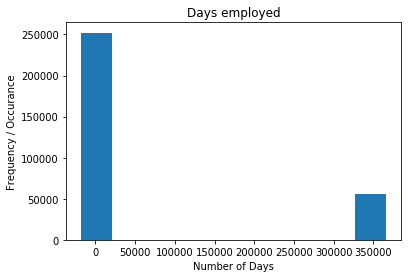

In [22]:
app_train_data['DAYS_EMPLOYED'].plot.hist(title = 'Days employed')
plt.xlabel('Number of Days')
plt.ylabel('Frequency / Occurance')

In [23]:
anom = app_train_data[app_train_data['DAYS_EMPLOYED']==365243]
non_anom = app_train_data[app_train_data['DAYS_EMPLOYED']!=365243]

In [24]:
print('Number of records in Anomily:',len(anom),', Percentage value',round((len(anom)/len(app_train_data)*100),2))
print('Number of records in NON - Anomily:',len(non_anom),', Percentage value',round((len(non_anom)/len(app_train_data)*100),2))

Number of records in Anomily: 55374 , Percentage value 18.01
Number of records in NON - Anomily: 252137 , Percentage value 81.99


In [25]:
print('Default rate of anamolous data:% 0.1f%%' % (100*anom['TARGET'].mean()))
print('Default rate of NON-anamolous data:% 0.1f%%' % (100*non_anom['TARGET'].mean()))

Default rate of anamolous data: 5.4%
Default rate of NON-anamolous data: 8.7%


##### Creating a new feature to identify Anamolus data

In [26]:
app_train_data['ANAMOLUS_DATA'] = app_train_data['DAYS_EMPLOYED']==365243

In [27]:
# app_train_data.shape
#(307511, 239)

In [28]:
app_train_data['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

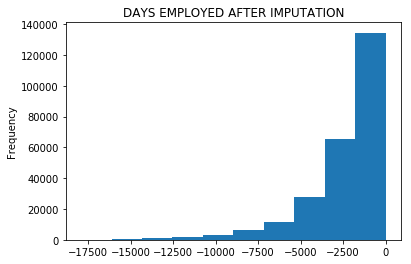

In [29]:
app_train_data['DAYS_EMPLOYED'].plot.hist(title = 'DAYS EMPLOYED AFTER IMPUTATION')

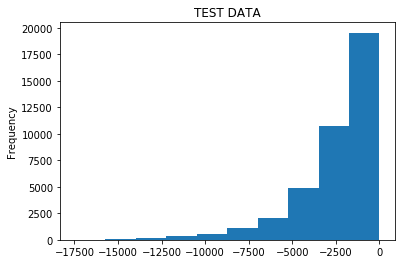

In [30]:
app_test_data['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)
app_test_data['DAYS_EMPLOYED'].plot.hist(title='TEST DATA')

### Correlation

In [31]:
correlation = app_train_data.corr()['TARGET'].sort_values()


In [32]:
print('Positive Correlation',correlation.tail(10))
print('Negative Correlation', correlation.head(10))

Positive Correlation NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Negative Correlation EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
NAME_INCOME_TYPE_Pensioner             -0.046209
ANAMOLUS_DATA                          -0.045987
ORGANIZATION_TY

In [33]:
app_train_data['DAYS_BIRTH'] = abs(app_train_data['DAYS_BIRTH'])
app_train_data['DAYS_BIRTH'].corr(app_train_data['TARGET'])

-0.07823930830982712

Text(0.5, 1.0, 'DAYS_BIRTH')

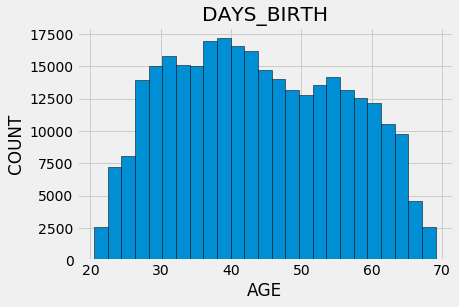

In [34]:
plt.style.use('fivethirtyeight')
plt.hist(app_train_data['DAYS_BIRTH']/365,bins =25,edgecolor = 'k')
plt.xlabel('AGE'); plt.ylabel('COUNT'); plt.title('DAYS_BIRTH')

### KERNEL DENSITY PLOT gives a better understanding about age group and its default risk

C:\Users\Premstein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


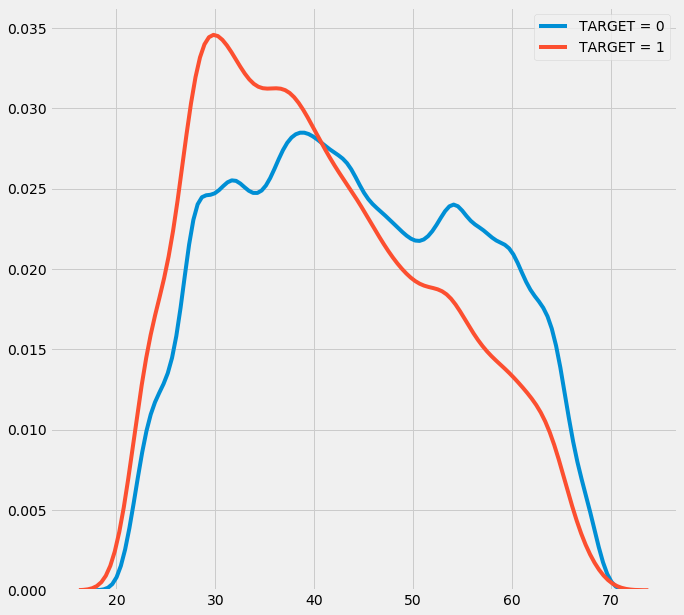

In [35]:
import seaborn as sns

plt.figure(figsize= (10,10))

sns.kdeplot(app_train_data.loc[app_train_data['TARGET'] == 0,'DAYS_BIRTH']/365 , label = 'TARGET = 0')
sns.kdeplot(app_train_data.loc[app_train_data['TARGET']==1, 'DAYS_BIRTH']/365 , label = 'TARGET = 1' )

In [36]:
AGE_DATA = app_train_data[['TARGET','DAYS_BIRTH']]

In [37]:
AGE_DATA['BIRTH_YEAR'] = round(AGE_DATA['DAYS_BIRTH']/365)

C:\Users\Premstein\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
AGE_DATA['BINNED DATA'] = pd.cut(AGE_DATA['BIRTH_YEAR'],np.linspace(20,70,num=11)) 

C:\Users\Premstein\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
AGE_DATA.head(10)

,TARGET,DAYS_BIRTH,BIRTH_YEAR,BINNED DATA
0,1,9461,26.0,"(25.0, 30.0]"
1,0,16765,46.0,"(45.0, 50.0]"
2,0,19046,52.0,"(50.0, 55.0]"
3,0,19005,52.0,"(50.0, 55.0]"
4,0,19932,55.0,"(50.0, 55.0]"
5,0,16941,46.0,"(45.0, 50.0]"
6,0,13778,38.0,"(35.0, 40.0]"
7,0,18850,52.0,"(50.0, 55.0]"
8,0,20099,55.0,"(50.0, 55.0]"
9,0,14469,40.0,"(35.0, 40.0]"


In [40]:
age_group = AGE_DATA.groupby(AGE_DATA['BINNED DATA'],axis=0).mean()

In [41]:
age_group

,TARGET,DAYS_BIRTH,BIRTH_YEAR
BINNED DATA,,,
"(20.0, 25.0]",0.121086,8631.638289,23.609512
"(25.0, 30.0]",0.111727,10309.381867,28.232196
"(30.0, 35.0]",0.100854,12033.562106,32.969751
"(35.0, 40.0]",0.088413,13881.443587,38.027623
"(40.0, 45.0]",0.077393,15671.045164,42.940963
"(45.0, 50.0]",0.073989,17499.613962,47.951609
"(50.0, 55.0]",0.065655,19366.709940,53.062876
"(55.0, 60.0]",0.054774,21161.476895,57.983749
"(60.0, 65.0]",0.052917,22942.321972,62.873175


Text(0.5, 1.0, 'Failure of replay by age group')

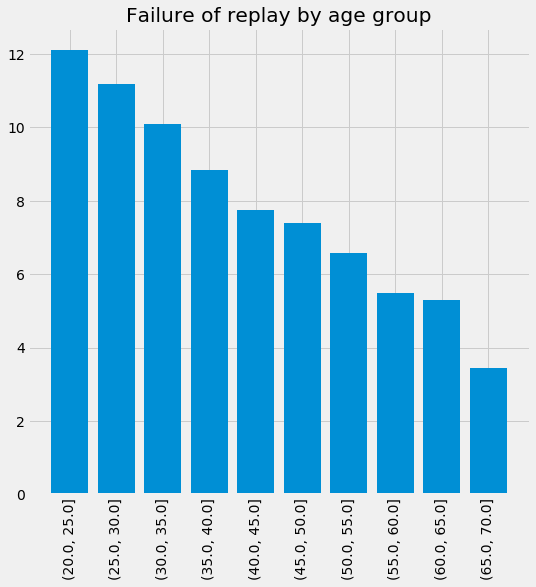

In [91]:
plt.figure(figsize=(8,8))
plt.bar(age_group.index.astype(str),age_group['TARGET']*100)
plt.xticks(rotation=90)
plt.title('Failure of replay by age group')

In [43]:
ext_data = app_train_data[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

ext_data_corr = ext_data.corr()
ext_data_corr

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'External Source')

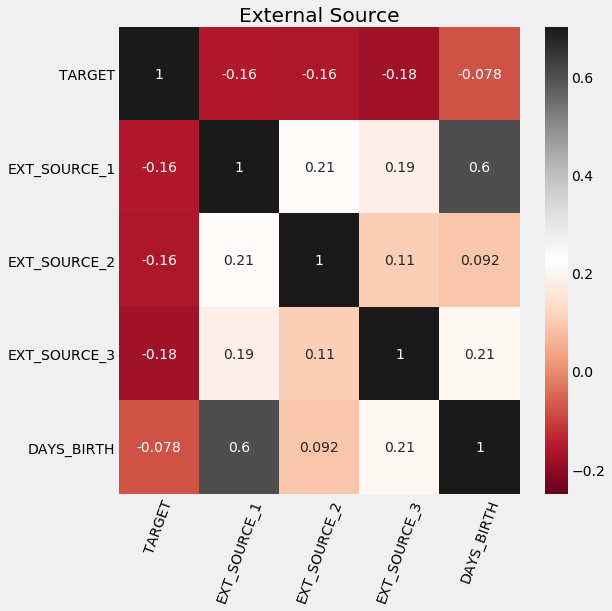

In [44]:
plt.figure(figsize=(8,8))

sns.heatmap(ext_data_corr,vmin=-.25,vmax=.7,cmap=plt.cm.RdGy,annot=True)
plt.xticks(rotation = 70)
plt.title('External Source')

### Feature Engineering - Polynomial Feature

In [45]:
poly_train = app_train_data[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
poly_test = app_test_data[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

from sklearn.preprocessing import Imputer

imput = Imputer(strategy = "median")

poly_train_target = poly_train['TARGET']

poly_train = poly_train.drop(['TARGET'],axis=1)

poly_train = imput.fit_transform(poly_train)
poly_test = imput.fit_transform(poly_test)

C:\Users\Premstein\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=3)

poly_train = poly_feature.fit_transform(poly_train)
poly_test = poly_feature.fit_transform(poly_test)

### Listing all feature names

In [47]:
poly_feature.get_feature_names(input_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'])[:10]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2']

### Creating a dataframe of polynomial feature variables and pluging in column names

In [48]:
poly_train = pd.DataFrame(poly_train,columns= poly_feature.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

In [49]:
poly_train['TARGET'] = poly_train_target

In [50]:
poly_corr = poly_train.corr()['TARGET'].sort_values()
print(poly_corr.head(10))
print(poly_corr.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [51]:
poly_test = pd.DataFrame(poly_test,columns=poly_feature.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

### Merging polynomial feature with training features

In [52]:
poly_train['SK_ID_CURR'] = app_train_data['SK_ID_CURR']

app_train_poly= app_train_data.merge(poly_train,on = ['SK_ID_CURR'],how='left')

print('before allignment -app_train_poly',app_train_poly.shape)

before allignment -app_train_poly (307511, 275)


### Merging polynomial feature with testing features

In [53]:
poly_test['SK_ID_CURR'] = app_test_data['SK_ID_CURR']
app_test_poly = app_test_data.merge(poly_test,on=['SK_ID_CURR'],how='left')
print('before allignment - app_train_poly',app_test_poly.shape)

before allignment - app_train_poly (48744, 272)


### Alligning features in training and test data

In [54]:
app_train_poly,app_test_poly = app_train_poly.align(app_test_poly,join='inner',axis=1)

In [55]:
print('After allignment -app_train_poly',app_train_poly.shape)
print('After allignment - app_train_poly',app_test_poly.shape)

After allignment -app_train_poly (307511, 272)
After allignment - app_train_poly (48744, 272)


### Domain Features

In [56]:
# Create a copy
train_copy = app_train_data
test_copy =  app_test_data

train_copy['CREDIT_INCOME_PERCENT'] = train_copy['AMT_CREDIT']/ train_copy['AMT_INCOME_TOTAL']

train_copy['ANNUITY_INCOME_PERCENT'] = train_copy['AMT_ANNUITY'] / train_copy['AMT_INCOME_TOTAL']

train_copy['CREDIT TERM'] = train_copy['AMT_ANNUITY'] / train_copy['AMT_CREDIT']

train_copy['DAYS_EMPLOYED_PERC'] = train_copy['DAYS_EMPLOYED'] / train_copy['DAYS_BIRTH']

In [57]:
test_copy['CREDIT_INCOME_PERCENT'] = test_copy['AMT_CREDIT']/ test_copy['AMT_INCOME_TOTAL']

test_copy['ANNUITY_INCOME_PERCENT'] = test_copy['AMT_ANNUITY'] / test_copy['AMT_INCOME_TOTAL']

test_copy['CREDIT TERM'] = test_copy['AMT_ANNUITY'] / test_copy['AMT_CREDIT']

test_copy['DAYS_EMPLOYED_PERC'] = test_copy['DAYS_EMPLOYED'] / test_copy['DAYS_BIRTH']

0 CREDIT_INCOME_PERCENT
1 ANNUITY_INCOME_PERCENT


C:\Users\Premstein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Premstein\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Premstein\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


2 CREDIT TERM
3 DAYS_EMPLOYED_PERC


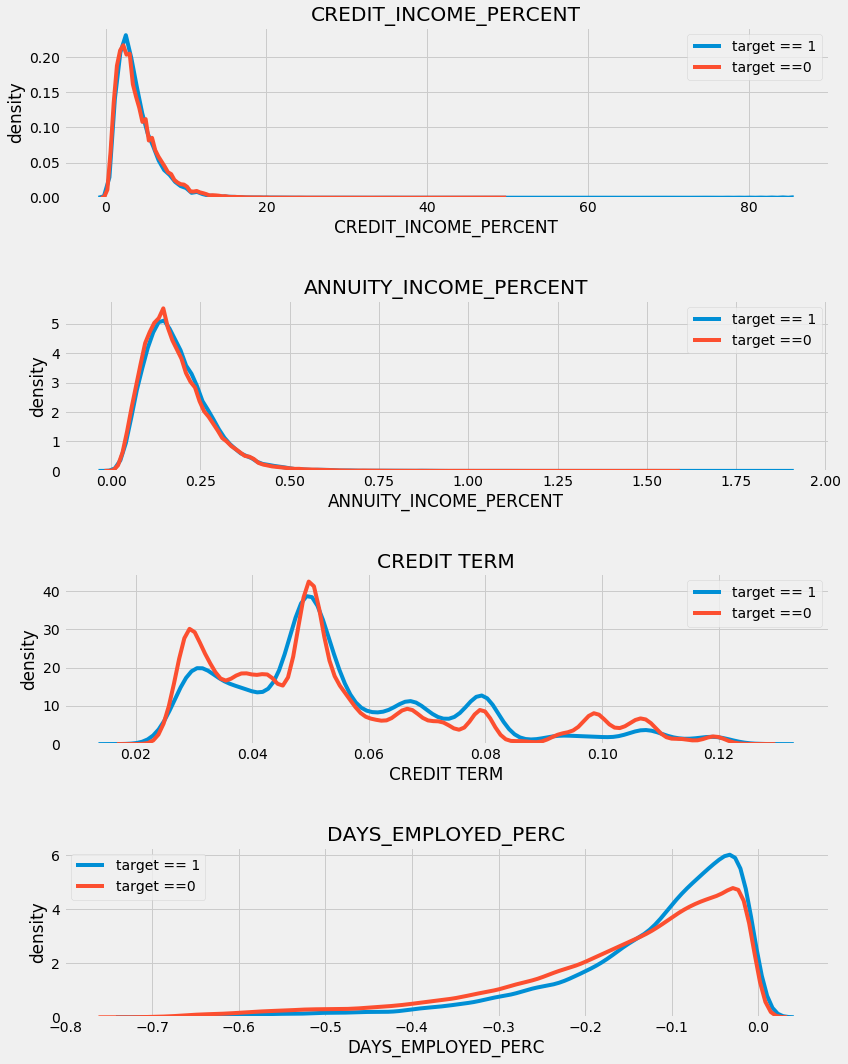

In [58]:
plt.figure(figsize=(12,15))

for i, feature in enumerate(['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT TERM','DAYS_EMPLOYED_PERC']):
    print(i,feature)
    
    plt.subplot(4,1,i+1)
    
    # Plotting for customers didn't repaid loan 
    sns.kdeplot(train_copy.loc[train_copy['TARGET']==1,feature],label = 'target == 1')
    
    # Plotting for customers repaid loan
    sns.kdeplot(train_copy.loc[train_copy['TARGET']==0, feature],label = 'target ==0')
    
    # plot title
    
    plt.title(feature)
    
    plt.xlabel(feature); plt.ylabel('density')
    
plt.tight_layout(h_pad=3)
    
    
    

### Data Modelling using non-feature variables

In [59]:
print('before droping TARGET',app_train_data.shape)

app_train_data_3 = app_train_data.drop(columns=['TARGET'],axis=1)

# for col in app_train_data_2:
#     print(col)

print('after droping TARGET',app_train_data_3.shape)

before droping TARGET (307511, 243)
after droping TARGET (307511, 242)


In [60]:
app_train_data_3,app_test_data = app_train_data_3.align(app_test_data,join='inner',axis=1)
print('after droping TARGET',app_train_data_3.shape)
print('Testing data shape',app_test_data.shape)


after droping TARGET (307511, 241)
Testing data shape (48744, 241)


In [61]:
app_train = app_train_data_3.copy()
    
print('Training data shape',app_train.shape)   

# #  List Features
# feature_list = list(app_train.columns)

app_test = app_test_data.copy()

print('Testing data shape',app_test.shape)

Training data shape (307511, 241)
Testing data shape (48744, 241)


In [62]:
from sklearn.preprocessing import MinMaxScaler

imputer = Imputer(strategy='median')

app_train = imputer.fit_transform(app_train)
app_test = imputer.fit_transform(app_test)

C:\Users\Premstein\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [63]:
mm_scaler = MinMaxScaler(feature_range=(0,1))

app_train = mm_scaler.fit_transform(app_train)
app_test = mm_scaler.fit_transform(app_test)

### BASE MODEL - LogisticRegression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
log_reg = LogisticRegression(C=.00001)

log_reg.fit(app_train,target_var)

C:\Users\Premstein\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
log_pred = log_reg.predict_proba(app_test)[:,1]


In [67]:
submit = pd.DataFrame
submit = app_test_data[['SK_ID_CURR']]
submit['FINAL'] = log_pred
submit.head(10)

C:\Users\Premstein\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,FINAL
0,100001,0.109926
1,100005,0.125981
2,100013,0.130131
3,100028,0.091191
4,100038,0.127393
5,100042,0.105517
6,100057,0.115958
7,100065,0.140846
8,100066,0.103468
9,100067,0.133301


In [68]:
#submit.to_csv('logistic_Regression.csv')

### Realistic Case - Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rand_forest = RandomForestClassifier(n_estimators=100,random_state=50,verbose=1,n_jobs= -1)
rand_forest.fit(app_train,target_var)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [71]:
feature_importance_value = rand_forest.feature_importances_
feature_importances_ = pd.DataFrame({'feature':feature,'importance':feature_importance_value})

rand_pred_prob = rand_forest.predict_proba(app_test)[:,1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


In [72]:
submit1 = pd.DataFrame
submit1 = app_test_data[['SK_ID_CURR']]
submit1['FINAL'] = rand_pred_prob

submit1.head(10)

C:\Users\Premstein\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,FINAL
0,100001,0.17
1,100005,0.18
2,100013,0.12
3,100028,0.18
4,100038,0.19
5,100042,0.15
6,100057,0.08
7,100065,0.19
8,100066,0.13
9,100067,0.21


In [73]:
submit1.to_csv('Base_rand_forest.csv')

### Using the feature engineeried Dataset - Polynomial Features

In [74]:
imputer = Imputer(strategy = 'median')

poly_train = imputer.fit_transform(app_train_poly)
poly_test = imputer.fit_transform(app_test_poly)

mm_scaler = MinMaxScaler(feature_range=(0,1))

poly_train = mm_scaler.fit_transform(poly_train)
poly_test = mm_scaler.fit_transform(poly_test)



C:\Users\Premstein\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [75]:
rand_forest = RandomForestClassifier(n_estimators=100,random_state=50,verbose=1,n_jobs=-1)

rand_forest.fit(poly_train,poly_train_target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [76]:
rand_pred_prob1 = rand_forest.predict_proba(poly_test)[:,1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


In [77]:
submit2 = pd.DataFrame
submit2 = app_test_poly[['SK_ID_CURR']]
submit2['FINAL'] = rand_pred_prob1

submit2.head(10)

C:\Users\Premstein\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,FINAL
0,100001,0.34
1,100005,0.38
2,100013,0.16
3,100028,0.25
4,100038,0.37
5,100042,0.38
6,100057,0.09
7,100065,0.32
8,100066,0.12
9,100067,0.46


In [78]:
train_copy_X = train_copy.drop(columns=['TARGET'])

In [79]:
train_copy_X,test_copy = train_copy_X.align(test_copy,join='inner',axis=1)

### USING FEATURED ENGINEERED DOMAIN DATASET

In [80]:
imputer = Imputer(strategy='median')

train_copy_X = imputer.fit_transform(train_copy_X)
test_copy = imputer.fit_transform(test_copy)

mm_scaler = MinMaxScaler(feature_range=(0,1))

train_copy_X = mm_scaler.fit_transform(train_copy_X)
test_copy = mm_scaler.fit_transform(test_copy)

C:\Users\Premstein\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [81]:
rand_forest = RandomForestClassifier(n_estimators=100,random_state=50,verbose=1,n_jobs=-1)

rand_forest.fit(train_copy_X,target_var)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [82]:
rand_pred_prob2 = rand_forest.predict_proba(test_copy)[:,1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


In [83]:
# submit3 = pd.DataFrame

# submit3 = test_copy[['SK_ID_CURR']]

# # submit3['FINAL'] = rand_pred_prob2

# submit3

rand_pred_prob2

array([0.17, 0.18, 0.12, ..., 0.1 , 0.14, 0.25])